In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import time
import seaborn as sns
from collections import Counter
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, ClusterCentroids, NearMiss

ModuleNotFoundError: No module named 'numpy'

In [2]:
data = pd.read_csv('F:\Kuliah\Semester 7\Data Mining\Data Dow Jones\creditcard.csv', sep=',')
#data diambil dari kaggle.com/mlg-ulb/creditcardfraud

data2 = data

print (data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
#print seluruh data
print (data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [4]:
data.shape

(284807, 31)

In [5]:
#print rangkuman statistik per feature
pd.options.display.float_format = "{:.6f}".format
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [6]:
#print persentase data transaksi yang termasuk non fraud dan fraud pada dataset
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

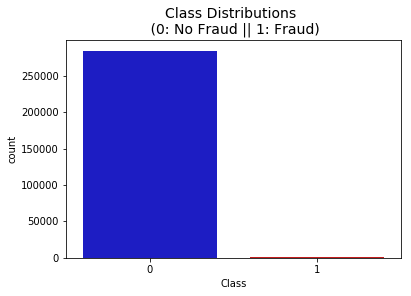

In [7]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [8]:
#mengelompokkan data berdasarkan Classnya
data.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [9]:
##melakukan feature scaling
##Feature Scaling adalah suatu cara untuk membuat numerical data 
##pada dataset memiliki rentang nilai (scale) yang sama. 
##Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

##membuat sub-sample dengan data 50/50
##men-scale kolom Time dan Amount, karena kolom yang lain sudah di-scale
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler menghilangkan median dan men-scale data berdasarkan quartile range-nya
# StandardScaler menghilangkan mean dan men-scale data ke unit variance

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
#mengubah nama kolom Time Amount menjadi scaled_time dan scaled_amount
scaled_amount = data['scaled_amount']
#scaled_time = data['scaled_time']

data.drop(['scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
#data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
#mengambil seluruh data fraud dan non-fraud
fraud_data_all = data2.loc[data2['Class'] == 1]
nonFraud_data_all = data2.loc[data2['Class']==0]

#menggabungkan data fraud dan non-fraud
normal_distributed_data_all = pd.concat([fraud_data_all, nonFraud_data_all])
normal_distributed_data_all.shape
#normal_distributed_data_all.head()
# data2.head()
#fraud_data_all.shape

X2 = normal_distributed_data_all.drop('Class', axis=1)
y2 = normal_distributed_data_all['Class']
#X2 --> variabel label untuk prediksi
#y2 --> variabel feature, semua kolom kecuali X (Class)

#Memecah dataframe baru menjadi training dan test set
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=0)

#mengubah ke array agar lebih mudah untuk algoritma klasifikasi
X_train2 = X_train2.values
X_test2 = X_test2.values
y_train2 = y_train2.values
y_test2 = y_test2.values


print ("Rincian class pada data training {} dan testing {} " .format(Counter(y_train2), Counter(y_test2)))
#y_train2.shape
#y_test2.shape


Rincian class pada data training Counter({0: 227453, 1: 392}) dan testing Counter({0: 56862, 1: 100}) 


In [12]:
X_train2.shape

(227845, 29)

In [13]:
X_test2.shape

(56962, 29)

In [14]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [15]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [16]:
#implementasi teknik ENN untuk undersampling
t0 = time.time()

##renn = RepeatedEditedNearestNeighbours (sampling_strategy='not minority', n_neighbors=5)
nm = NearMiss(sampling_strategy=0.01, version=1)
##from imblearn.under_sampling import 
cc = ClusterCentroids ()
enn = EditedNearestNeighbours(sampling_strategy={0 : 10000, 1 : 396}, n_neighbors=3)
##X_renn, y_renn = renn.fit_sample(X_train2,y_train2)
X_nm, y_nm = nm.fit_resample(X_train2, y_train2)
#X_enn, y_enn = enn.fit_resample(X_train2, y_train2)

t1 = time.time()

print("Training time untuk {}: {:3f} detik" .format(nm.__class__.__name__, t1-t0))
print ("Class pada dataset {} " .format(Counter(y_nm)))



Training time untuk NearMiss: 4.523009 detik
Class pada dataset Counter({0: 39200, 1: 392}) 


In [17]:
X_nm.shape

(39592, 29)

In [18]:
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
# import time
# import matplotlib.patches as mpatches

# def plot_dim (x,y):
#     #implementasi T-SNE
#     X_reduced_tsne = TSNE (n_components=2, random_state=10).fit_transform(x)
    
#     #impelemntasi PCA
#     X_reduced_pca = PCA (n_components=2, random_state=10).fit_transform(x)
    
#     #implementasi Truncatedd SVD
#     X_reduced_svd = TruncatedSVD (n_components=2, algorithm='randomized', random_state=2).fit_transform(x)
    
#     #membuat gambar
#     f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24,6))
#     f.suptitle ('Clusters using Dimensionality Reduction', fontsize=14)
    
#     blue_patch = mpatches.Patch (color='#0A0AFF', label ='No Fraud')
#     red_patch = mpatches.Patch (color ='#AF0000', label ='Fraud')
    
#     #scatter plot t-SNE
#     ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 0),
#                 cmap='coolwarm', label='No Fraud', linewidths=2)
#     ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 1),
#                 cmap='coolwarm', label='Fraud', linewidths=2)
#     ax1.set_title('t-SNE', fontsize=14)

#     ax1.grid(True)

#     ax1.legend(handles=[blue_patch, red_patch])


#     # scatter plot PCA
#     ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 0),
#                 cmap='coolwarm', label='No Fraud', linewidths=2)
#     ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 1),
#                 cmap='coolwarm', label='Fraud', linewidths=2)
#     ax2.set_title('PCA', fontsize=14)

#     ax2.grid(True)

#     ax2.legend(handles=[blue_patch, red_patch])

#     # scatter plot Truncated SVD
#     ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 0),
#                 cmap='coolwarm', label='No Fraud', linewidths=2)
#     ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 1),
#                 cmap='coolwarm', label='Fraud', linewidths=2)
#     ax3.set_title('Truncated SVD', fontsize=14)

#     ax3.grid(True)

#     ax3.legend(handles=[blue_patch, red_patch])

#     plt.show()

In [19]:
# from sklearn.utils import resample

# #x_renn_plot, y_renn_plot = resample(X_renn,y_renn, n_samples = 50000, random_state = 0)
# x_nm_plot, y_nm_plot = resample(X_nm,y_nm, random_state = 0)

# plot_dim (x_nm_plot,y_nm_plot)

In [20]:
classifiers = {"LogReg" : LogisticRegression()}

from sklearn.model_selection import cross_val_score

t0 = time.time()
for key, classifier in classifiers.items():
    classifier.fit(X_nm, y_nm)
    training_score = cross_val_score(classifier, X_nm, y_nm,
                                    cv=5)
#     print("Classifiers: ", classifier.__class__.__name__, "training skor akurasinya", round(training_score.mean(),2)*100,
 #        "%")
t1 = time.time()

print ('Training logistic regression untuk under sampling {} memakan waktu: {:3f} detik' .format(nm.__class__.__name__, t1-t0))

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

Training logistic regression untuk under sampling NearMiss memakan waktu: 3.834550 detik


In [21]:
from sklearn.model_selection import GridSearchCV

# t0 = time.time()
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                  'solver' : ['liblinear','saga'], 'max_iter' : [100], 'multi_class' : ['ovr'],
                 'class_weight' : ['balanced']}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_nm, y_nm)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print (log_reg)


C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Program Files (x86)\Python37-32\lib\site-pac

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l1', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)


In [22]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
# Create a DataFrame with all the scores and the classifiers names.
#t0 = time.time()
log_reg_pred = cross_val_predict(log_reg, X_nm, y_nm, cv=5,
                             method="decision_function")

In [23]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# t0= time.time()
y_pred = log_reg.predict(X_nm)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_nm, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_nm, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_nm, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_nm, y_pred)))


Classification Report Logistic Regression:
Recall Score: 0.90
Precision Score: 0.50
F1 Score: 0.64
Accuracy Score: 0.99


C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MemoryError: 

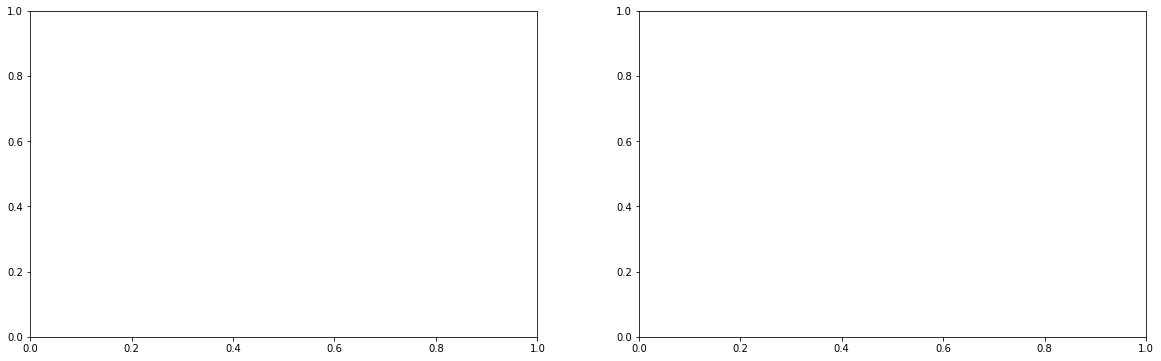

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))
clf  = make_pipeline(nm, LogisticRegression())
#log_reg = make_pipeline(nm, LogisticRegression())
clf.fit(X_train2, y_train2)
plot_decision_function (X_train2, y_train2, clf, ax1)
ax1.set_title('Decision function for {}' .format(nm.__class__.__name__))

plot_resampling (X_train2, y_train2, nm, ax2)
ax2.set_title('Resampling using {}' .format(nm.__class__.__name__))
fig.tight_layout()


In [ ]:
from sklearn.metrics import confusion_matrix

#Menerapkan confusion matrix pada testing set
y_pred_log_reg = log_reg.predict(X_test2)


#log
#mengganti testing setnya dengan testing set untuk data keseluruhan
log_reg_cf = confusion_matrix(y_test2, y_pred_log_reg)

import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(log_reg_cf, labels, title="Confusion Matrix Logistic Regression \n Under Sampling {}" .format(nm.__class__.__name__) , cmap=plt.cm.inferno)

In [ ]:
G_mean_under_sampling_enn = geometric_mean_score (y_test2, y_pred_log_reg)

print ("G-Mean untuk ENN: ", G_mean_under_sampling_enn)

In [ ]:
print('Logistic Regression dengan Down Sampling:')
print(classification_report(y_test2, y_pred_log_reg))